<a href="https://colab.research.google.com/github/LRLeite/Data-Analytics/blob/main/Projeto%20IMDb/IMDb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🎬 Análise das Avaliações de Filmes e Séries, Segundo o IMDb**


Este notebook foi desenvolvido para realizar uma análise sobre os filmes e séries avaliados no IMDb. O objetivo central é analisar as avaliações do público sobre filmes e séries.<br>



## **🎯 Objetivos da Análise**

Ao longo deste notebook, as seguintes perguntas foram abordadas e respondidas:

* Qual a quantidade de títulos por categoria (Filmes longa metragem e Séries de TV)?

* Quais são os TOP 10 Filmes com as melhores avaliações?

* Quais são os TOP 10 Filmes com as piores avaliações?

* Quais são as TOP 10 Séries de TV com as melhores avaliações?

* Quais são as TOP 10 Séries de TV com as piores avaliações?

* Quais filmes possuem a maior duração?
<br><br>

**Fonte dos dados:** [IMDB](https://datasets.imdbws.com/)<br>
**Informações sobre os dados:** https://www.imdb.com/interfaces/

# **Bibliotecas**

In [1]:
import pandas as pd
import gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Importar os dados**

In [2]:
#Salvar o link dos dados das informações básicas num objeto
url_basics = 'https://datasets.imdbws.com/title.basics.tsv.gz'

#Importar o dataset com os dados das informações básicas
basics = pd.read_csv(url_basics, compression = 'gzip', sep = '\t', usecols = ['tconst','titleType', 'originalTitle', 'runtimeMinutes', 'genres'])
basics.head()

,tconst,titleType,originalTitle,runtimeMinutes,genres
0,tt0000001,short,Carmencita,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,1,Short


In [3]:
#Verificar estrutura dos dados
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11734860 entries, 0 to 11734859
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   originalTitle   object
 3   runtimeMinutes  object
 4   genres          object
dtypes: object(5)
memory usage: 447.6+ MB


In [4]:
#Salvar o link dos dados das avaliações num objeto
url_ratings = 'https://datasets.imdbws.com/title.ratings.tsv.gz'

#Importar o dataset com os dados das avaliações
ratings = pd.read_csv(url_ratings, compression = 'gzip', sep = '\t')
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2164
1,tt0000002,5.5,296
2,tt0000003,6.5,2216
3,tt0000004,5.3,189
4,tt0000005,6.2,2955


In [5]:
#Verificar estrutura dos dados
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581386 entries, 0 to 1581385
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1581386 non-null  object 
 1   averageRating  1581386 non-null  float64
 2   numVotes       1581386 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 36.2+ MB


# **Preparar os datasets**

In [6]:
#Verificar a quantidade de valores únicos em ratings
ratings.tconst.nunique()

1581386

In [7]:
#Verificar a quantidade de títulos únicos em basics
basics.originalTitle.nunique()

5310911

In [8]:
#Verificar se existem 'tconst' duplicados em basics
basics[basics['tconst'].duplicated(keep = False)]

,tconst,titleType,originalTitle,runtimeMinutes,genres


In [9]:
#Verificar se existem ´tconst´ duplicados em ratings
ratings[ratings['tconst'].duplicated(keep = False)]

,tconst,averageRating,numVotes


Isso mostra que nem todos os títulos possuem avaliação (existem 1.580.294 avaliações contra 5.308.082 de títulos).<br>
Para os propósitos desta análise, os títulos e as avaliações serão utilizados. Dessa forma, ao juntar os datasets utilizarei o inner join para ficar apenas com as observações que possuem títulos e avaliações.

## **Realizar join das tabelas para visualizar as avaliações de cada título**

In [10]:
#Verificar os tipos de conteúdos no dataset, para selecionar apenas filmes e séries para análise
basics.titleType.unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvEpisode', 'tvSeries',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [11]:
#Join das tabelas, incluindo "title", "type", "year", "runtime" dos filmes longa mentragem, filmes de tc e séries de TV com suas respectivas avaliações
#Para selecionar apenas os filmes longa metragem, o tipo de titulo deve ser 'movie'
df_merge = pd.merge(basics[['tconst', 'titleType', 'originalTitle', 'runtimeMinutes']].loc[basics.titleType.isin(['movie', 'tvSeries'])], ratings[['tconst','averageRating', 'numVotes']], on = 'tconst', how = 'inner')
df_merge.head()

,tconst,titleType,originalTitle,runtimeMinutes,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,45,5.4,226
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,100,5.3,562
2,tt0000502,movie,Bohemios,100,3.6,22
3,tt0000574,movie,The Story of the Kelly Gang,70,6.0,1003
4,tt0000591,movie,L'enfant prodigue,90,5.4,33


In [12]:
#Verificar valores ausentes
df_merge.isna().sum()

,0
tconst,0
titleType,0
originalTitle,1
runtimeMinutes,0
averageRating,0
numVotes,0


In [13]:
#Verificar NA
df_merge[df_merge['originalTitle'].isna()]

,tconst,titleType,originalTitle,runtimeMinutes,averageRating,numVotes
388525,tt5774076,movie,NaN,\N,7.1,10


In [14]:
#Como o título será utilizado nas análises e essa observação não possui, irei remover do dataset
df_merge = df_merge.dropna(subset = ['originalTitle'])

In [15]:
#Verificar a estrutura dos dados
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 436176 entries, 0 to 436176
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          436176 non-null  object 
 1   titleType       436176 non-null  object 
 2   originalTitle   436176 non-null  object 
 3   runtimeMinutes  436176 non-null  object 
 4   averageRating   436176 non-null  float64
 5   numVotes        436176 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 23.3+ MB




Conforme informado no site do [IMDb](https:www.imdb.com/interfaces/), '\\\N' é usado para indicar que um determinado campo está ausente ou nulo para esse título/nome". Além disso, as colunas 'startYear', 'endYear', 'runtimeMinutes' são do tipo 'object', o que impossibilita análises númericas que serão realizadas na sequência. Dessa forma, para converter as colunas para tipo númerico na sequência, substituirei os valores '\\\N ' por nan, para evitar a distorção nas avaliações e enviesamento dos rankings.



In [16]:
#Verificar se existe '\N' em alguma coluna do dataset e contar
total_n_count = 0
for col in df_merge.columns:
    #Converte a cluna para string antes de checar
    col_as_str = df_merge[col].astype(str)
    n_count = (col_as_str == '\\N').sum()
    if n_count > 0:
         print(f"A coluna '{col}' contém {n_count} valores exatamente iguais a '\\N'")
         total_n_count += n_count
    else:
        print(f"Não tem nenhum valor igual a '\\N' em {col}")

Não tem nenhum valor igual a '\N' em tconst
Não tem nenhum valor igual a '\N' em titleType
Não tem nenhum valor igual a '\N' em originalTitle
A coluna 'runtimeMinutes' contém 82188 valores exatamente iguais a '\N'
Não tem nenhum valor igual a '\N' em averageRating
Não tem nenhum valor igual a '\N' em numVotes


In [17]:
#Substituir '\\N' por NaN
df_merge = df_merge.replace('\\N', np.nan)

In [18]:
#Verificar se existe '\N' em alguma coluna do dataset e contar
total_n_count = 0
for col in df_merge.columns:
    #Converte a cluna para string antes de checar
    col_as_str = df_merge[col].astype(str)
    n_count = (col_as_str == '\\N').sum()
    if n_count > 0:
         print(f"A coluna '{col}' contém {n_count} valores exatamente iguais a '\\N'")
         total_n_count += n_count
    else:
        print(f"Não tem nenhum valor igual a '\\N' em {col}")

Não tem nenhum valor igual a '\N' em tconst
Não tem nenhum valor igual a '\N' em titleType
Não tem nenhum valor igual a '\N' em originalTitle
Não tem nenhum valor igual a '\N' em runtimeMinutes
Não tem nenhum valor igual a '\N' em averageRating
Não tem nenhum valor igual a '\N' em numVotes


In [19]:
#Converter colunas para tipo Int64
df_merge[['runtimeMinutes', 'numVotes']] = df_merge[['runtimeMinutes', 'numVotes']].astype('Int64')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 436176 entries, 0 to 436176
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          436176 non-null  object 
 1   titleType       436176 non-null  object 
 2   originalTitle   436176 non-null  object 
 3   runtimeMinutes  353988 non-null  Int64  
 4   averageRating   436176 non-null  float64
 5   numVotes        436176 non-null  Int64  
dtypes: Int64(2), float64(1), object(3)
memory usage: 24.1+ MB


In [20]:
#Verificar NAs
df_merge.isna().sum()

,0
tconst,0
titleType,0
originalTitle,0
runtimeMinutes,82188
averageRating,0
numVotes,0


In [21]:
#Criar a variável de duração do filme em horas
df_merge['runTimeHours'] = round(df_merge['runtimeMinutes'] / 60, 2)
df_merge.head()

,tconst,titleType,originalTitle,runtimeMinutes,averageRating,numVotes,runTimeHours
0,tt0000009,movie,Miss Jerry,45,5.4,226,0.75
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,100,5.3,562,1.67
2,tt0000502,movie,Bohemios,100,3.6,22,1.67
3,tt0000574,movie,The Story of the Kelly Gang,70,6.0,1003,1.17
4,tt0000591,movie,L'enfant prodigue,90,5.4,33,1.5




# **Análises**



##**Disclaimer**

O IMDb avalia filmes e séries usando um sistema complexo, não apenas uma média simples de votos. Os principais critérios são:

* Classificação Ponderada: O IMDb usa uma média ponderada para as classificações, onde nem todos os votos têm o mesmo impacto. O método exato é mantido em sigilo para evitar manipulações

* Votos para o Top 250: são considerados apenas os votos de "eleitores regulares", cujos critérios são secretos. Um título precisa de no mínimo 25.000 votos para ser considerado, e a média geral de votos do banco de dados (aproximadamente 7.0) também influencia.

* Avaliações de Usuários: usuários podem enviar avaliações detalhadas, seguindo diretrizes específicas, como avisar sobre spoilers e focar no conteúdo.

Dessa forma, para os fins desta análise, utilizarei o único critério concreto (>= 25.000 votos) e isso pode refletir em títulos diferentes do ranking oficial do IMDb.

## **Quantidade de títulos por categoria**

In [22]:
df_merge[['originalTitle', 'titleType']].groupby('titleType').count()

,originalTitle
titleType,
movie,331476
tvSeries,104700


## **TOP 10 Filmes longa metragem com as melhores avaliações**

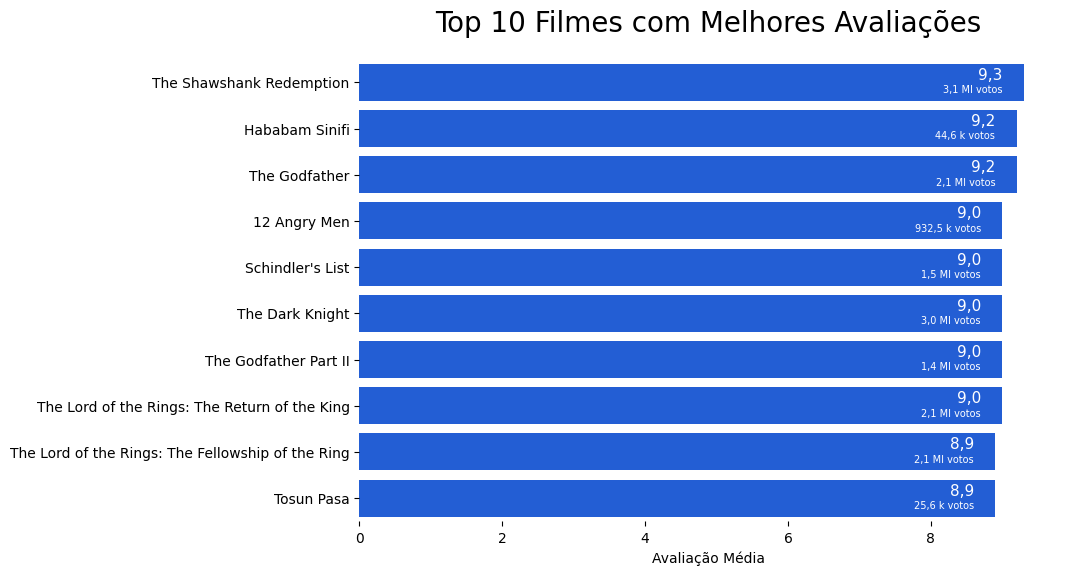

In [23]:
#Seleciona os dados para a análise
top10_movies = df_merge[['originalTitle', 'averageRating', 'numVotes']].loc[(df_merge.titleType == 'movie') & (df_merge.numVotes >= 25000)].sort_values(by = 'averageRating', ascending = False).set_index('originalTitle').head(10)

#Cria uma figura para o gráfico
plt.figure(figsize = (9, 6), dpi = 100)

#Gera o gráfico
ax = sns.barplot(x = top10_movies['averageRating'], y = top10_movies.index, legend = False, color = '#0554F2')
plt.title('Top 10 Filmes com Melhores Avaliações', pad = 20, ha = 'center', fontsize = 20)
plt.xlabel('Avaliação Média')
plt.ylabel('')

#Remover bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

#Função para formatar o número de votos
def format_votes(votes):
    if votes >= 1_000_000:
        #Formatar em milhões com uma casa decimal, usando ponto como separador decimal para exibição
        return f'{votes / 1_000_000:.1f} MI'.replace('.', ',')
    elif votes >= 1_000:
        #Formatar em milhares com uma casa decimal, usando ponto como separador decimal para exibição
        return f'{votes / 1_000:.1f} k'.replace('.', ',')
    else:
        #Manter o número original para menos de mil
        return f'{votes:,.0f}'.replace(',', '.') # Usar ponto como separador de milhar para menos de mil

#Adicionar rótulo nas barras
for i, (rating, votes) in enumerate(zip(top10_movies['averageRating'], top10_movies['numVotes'])):
    ax.text(rating - 0.3, i - 0.0, f'{rating:.1f}'.replace('.',','), va = 'bottom', ha = 'right', fontsize = 11, color = 'white') #Label para averageRating
    #Usar a função format_votes para formatar o número de votos
    ax.text(rating - 0.3, i + 0.05, f'{format_votes(votes)} votos', va = 'top', ha = 'right', fontsize = 7, color  ='white') # Label para numVotes

ax.grid(False)


plt.show()

## **TOP 10 Filmes longa metragem com as piores avaliações**


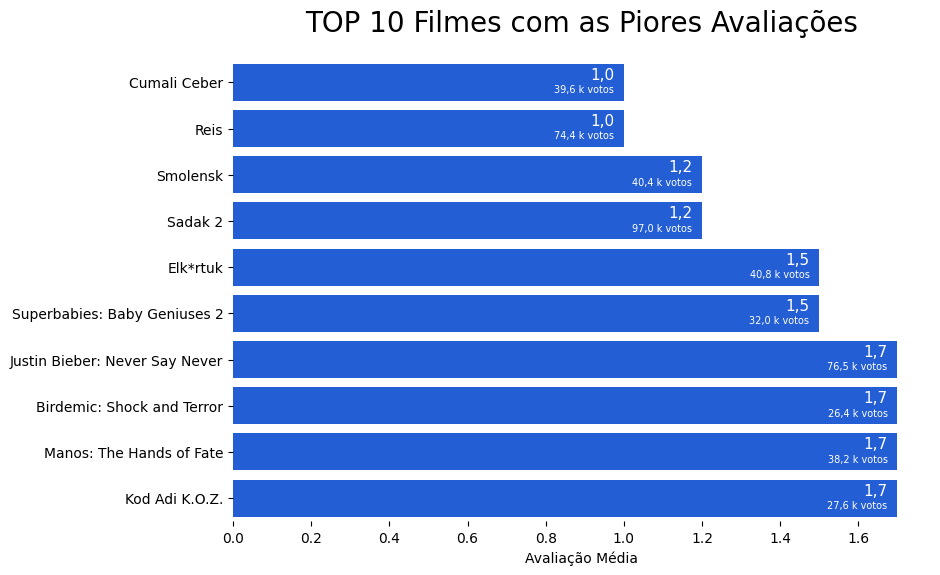

In [24]:
#Seleciona os dados para a análise
bottom10_movies = df_merge[['originalTitle', 'averageRating', 'numVotes']].loc[(df_merge.titleType == 'movie') & (df_merge.numVotes >= 25000)].sort_values(by = 'averageRating').set_index('originalTitle').head(10)

#Cria uma figura para o gráfico
plt.figure(figsize = (9, 6), dpi = 100)

#Gera o gráfico
ax = sns.barplot(x = bottom10_movies['averageRating'], y = bottom10_movies.index, legend = False, color = '#0554F2')
plt.title('TOP 10 Filmes com as Piores Avaliações', pad = 20, ha = 'center', fontsize = 20)
plt.xlabel('Avaliação Média')
plt.ylabel('')

#Remover bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

#Função para formatar o número de votos
def format_votes(votes):
    if votes >= 1_000_000:
        #Formatar em milhões com uma casa decimal, usando ponto como separador decimal para exibição
        return f'{votes / 1_000_000:.1f} MI'.replace('.', ',')
    elif votes >= 1_000:
        #Formatar em milhares com uma casa decimal, usando ponto como separador decimal para exibição
        return f'{votes / 1_000:.1f} k'.replace('.', ',')
    else:
        #Manter o número original para menos de mil
        return f'{votes:,.0f}'.replace(',', '.') # Usar ponto como separador de milhar para menos de mil

#Adicionar rótulo nas barras
for i, (rating, votes) in enumerate(zip(bottom10_movies['averageRating'], bottom10_movies['numVotes'])):
    ax.text(rating - 0.025, i - 0.0, f'{rating:.1f}'.replace('.',','), va = 'bottom', ha = 'right', fontsize = 11, color = 'white') #Label para averageRating
    #Usar a função format_votes para formatar o número de votos
    ax.text(rating - 0.025, i + 0.05, f'{format_votes(votes)} votos', va = 'top', ha = 'right', fontsize = 7, color  ='white') # Label para numVotes

ax.grid(False)


plt.show()

## **TOP 10 Séries de TV com as melhores avaliações**

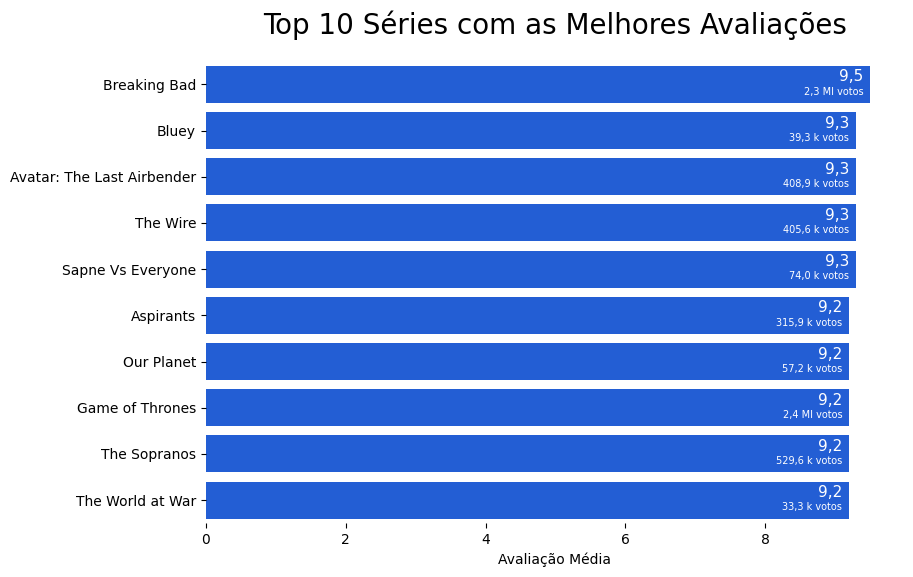

In [25]:
#Seleciona os dados para a análise
top10_series = df_merge[['originalTitle', 'averageRating', 'numVotes']].loc[(df_merge.titleType == 'tvSeries') & (df_merge.numVotes >= 25000)].sort_values(by = 'averageRating', ascending = False).set_index('originalTitle').head(10)

#Cria uma figura para o gráfico
plt.figure(figsize = (9, 6), dpi = 100)

#Gera o gráfico
ax = sns.barplot(x = top10_series['averageRating'], y = top10_series.index, legend = False, color = '#0554F2')
plt.title('Top 10 Séries com as Melhores Avaliações', pad = 20, ha = 'center', fontsize = 20)
plt.xlabel('Avaliação Média')
plt.ylabel('')

#Remover bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

#Adicionar rótulo nas barras
for i, (rating, votes) in enumerate(zip(top10_series['averageRating'], top10_series['numVotes'])):
    ax.text(rating - 0.1, i - 0.0, f'{rating:.1f}'.replace('.',','), va = 'bottom', ha = 'right', fontsize = 11, color = 'white') #Label para averageRating
    #Usar a função format_votes para formatar o número de votos
    ax.text(rating - 0.1, i + 0.05, f'{format_votes(votes)} votos', va = 'top', ha = 'right', fontsize = 7, color  ='white') # Label para numVotes

ax.grid(False)


plt.show()

## **TOP 10 Séries de TV com as piores avaliações**

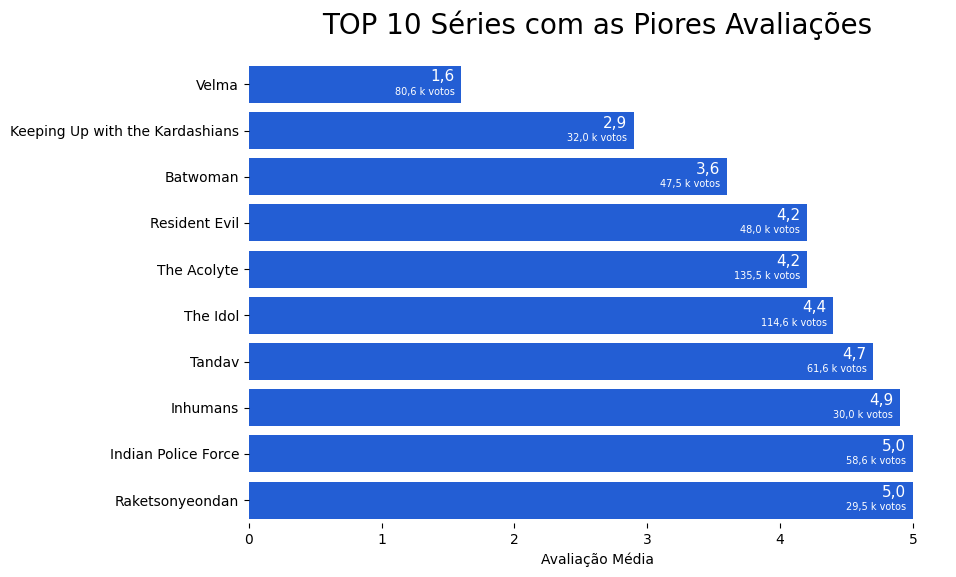

In [26]:
#Seleciona os dados para a análise
bottom10_series = df_merge[['originalTitle', 'averageRating', 'numVotes']].loc[(df_merge.titleType == 'tvSeries') & (df_merge.numVotes >= 25000)].sort_values(by = 'averageRating').set_index('originalTitle').head(10)

#Cria uma figura para o gráfico
plt.figure(figsize = (9, 6), dpi = 100)

#Gera o gráfico
ax = sns.barplot(x = bottom10_series['averageRating'], y = bottom10_series.index, legend = False, color = '#0554F2')
plt.title('TOP 10 Séries com as Piores Avaliações', pad = 20, ha = 'center', fontsize = 20)
plt.xlabel('Avaliação Média')
plt.ylabel('')

#Remover bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

#Adicionar rótulo nas barras
for i, (rating, votes) in enumerate(zip(bottom10_series['averageRating'], bottom10_series['numVotes'])):
    ax.text(rating - 0.05, i - 0.0, f'{rating:.1f}'.replace('.',','), va = 'bottom', ha = 'right', fontsize = 11, color = 'white') #Label para averageRating
    #Usar a função format_votes para formatar o número de votos
    ax.text(rating - 0.05, i + 0.05, f'{format_votes(votes)} votos', va = 'top', ha = 'right', fontsize = 7, color  ='white') # Label para numVotes

ax.grid(False)


plt.show()

## **Filmes com maior duração**

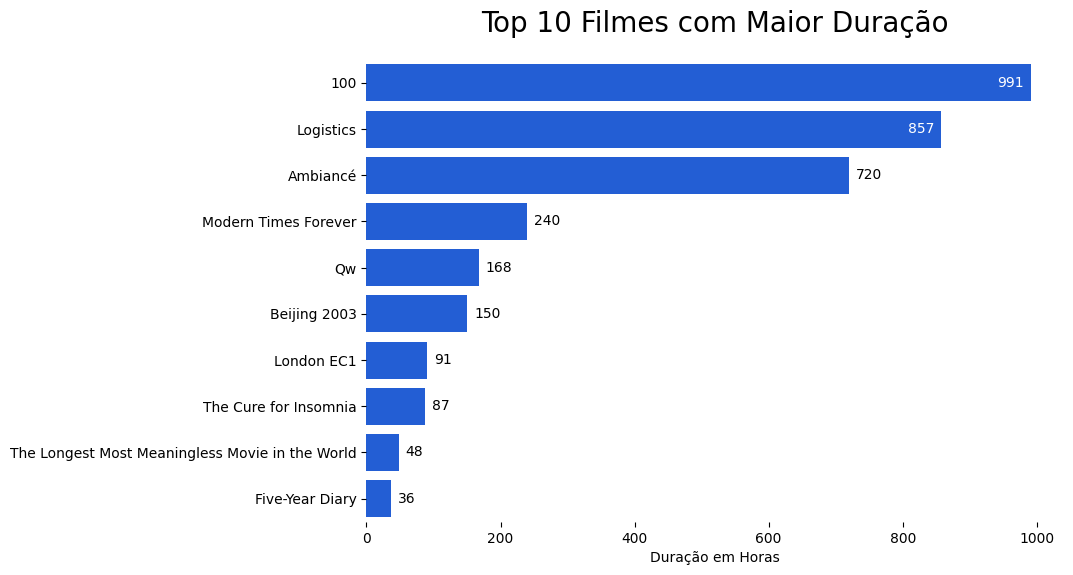

In [27]:
#Seleciona os dados para a análise
movies_runtime_hours = df_merge[['originalTitle', 'runTimeHours']].loc[df_merge.titleType == 'movie'].sort_values(by = 'runTimeHours', ascending = False).set_index('originalTitle').head(10)

#Cria uma figura para o gráfico
plt.figure(figsize = (9, 6), dpi = 100)

#Gera o gráfico
ax = sns.barplot(x = movies_runtime_hours['runTimeHours'], y = movies_runtime_hours.index, legend = False, color = '#0554F2')
plt.title('Top 10 Filmes com Maior Duração', pad = 20, ha = 'center', fontsize = 20) # Título corrigido
plt.xlabel('Duração em Horas') # Rótulo do eixo X corrigido
plt.ylabel('')

#Remover bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

#Adicionar rótulo nas barras (loop corrigido e ajustes para visibilidade)
for i, runTime in enumerate(movies_runtime_hours['runTimeHours']):
    #Determinar o alinhamento horizontal e a posição do texto
    if runTime > ax.get_xlim()[1] * 0.8: #Se o valor for maior que 80% do limite do eixo x
        ha = 'right'
        x_pos = runTime - (ax.get_xlim()[1] * 0.01) #Posicionar dentro da barra, um pouco antes do final
        color = 'white'
    else:
        ha = 'left'
        x_pos = runTime + (ax.get_xlim()[1] * 0.01)  #Posicionar fora da barra, um pouco depois do final
        color = 'black'

    ax.text(x_pos, i, f'{runTime:,.0f}'.replace(',', '.'), va = 'center', ha = ha, fontsize = 10, color = color) #Label para runTime


ax.grid(False)

plt.show()